# **Project Name**    - Netflix Movie and TV Shows Clustering


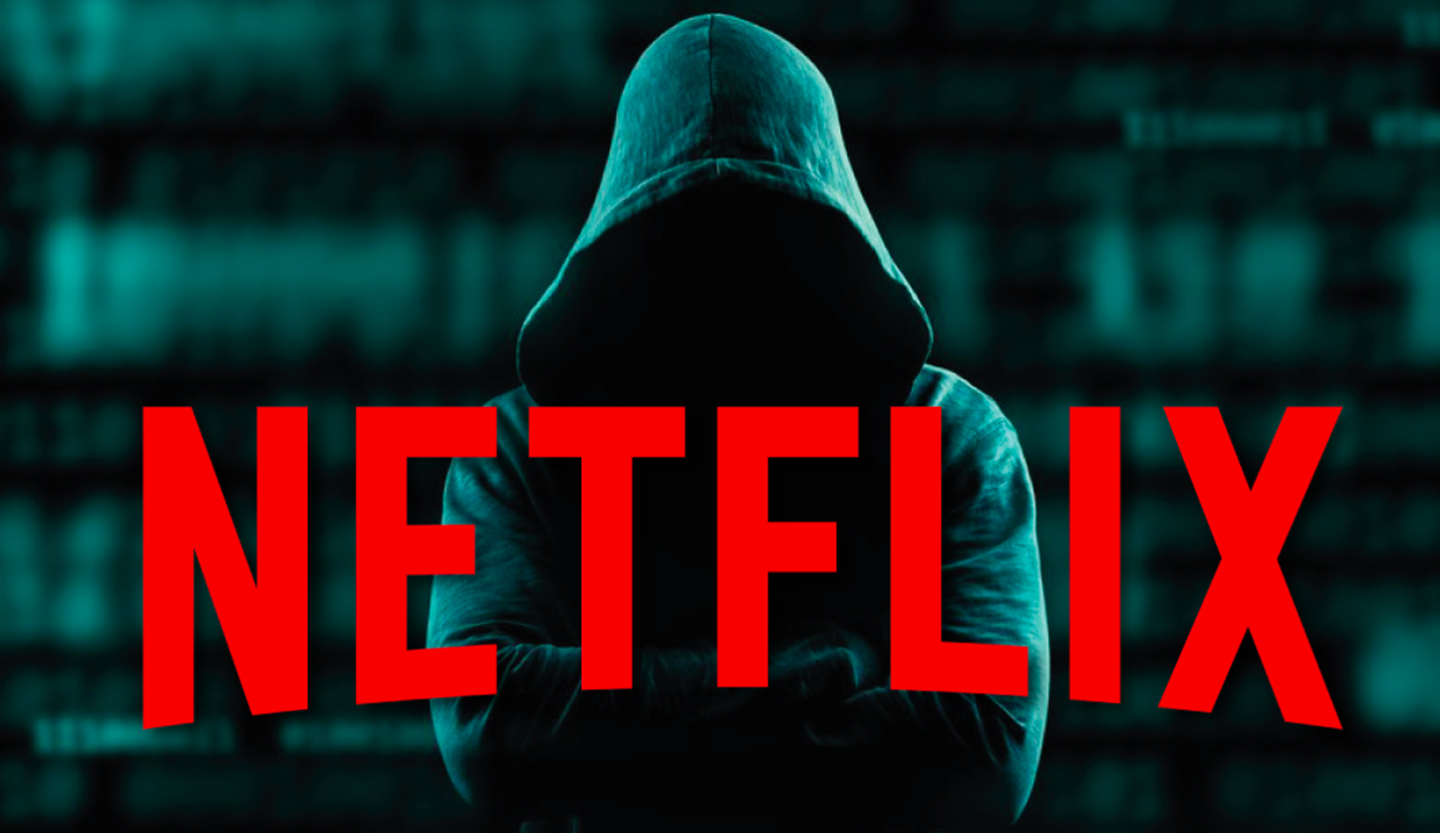

##### **Project Type**    - Unsupervised learning
##### **Contribution**    - Individual
##### **Member 1 - Sreenivasulu**


# **Project Summary -**

This project involves analyzing the content released on Netflix, the world's largest on-demand internet streaming media and online DVD movie rental service provider. The dataset consists of TV shows and movies available on Netflix as of 2019 and is collected from Fixable, a third-party Netflix search engine. 

The aim of this project is to categorize and cluster Netflix movies/shows according to their attributes such as genre, cast, director, rating, country, and description. This will enable the identification of groups of people who share similar preferences. The dataset consisted of 7787 records and 11 attributes. The project began with data cleaning and exploratory data analysis (EDA).

The attributes were tokenized, preprocessed, and vectorized using the TFIDF vectorizer. Principal Component Analysis (PCA) was used to handle the curse of dimensionality. Two types of clusters were created using the K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, and the optimal number of clusters was determined using different techniques such as elbow method, silhouette score, and dendogram.

Finally, a content-based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system recommends 10 shows/movies to the user based on the type of show they watched. Overall, the project provides insights into the Netflix dataset and helps users find similar shows/movies based on their preferences.



# **GitHub Link -** https://github.com/sreenu-DS-AI/Unsupervised-Machine-Learning

# **Problem Statement**

The problem statement of this project is to explore and analyze the Netflix dataset to identify patterns and similarities among TV shows and movies. The goal is to cluster the content into groups of similar shows and movies using attributes such as director, cast, country, genre, rating, and description. Additionally, the project aims to integrate external datasets like IMDB ratings and Rotten Tomatoes to provide insights into the content's quality and popularity. The ultimate objective is to build a content-based recommendation system that provides personalized recommendations to users based on their viewing behavior and preferences, ultimately enhancing the user experience on the Netflix platform.

# **Business context**
The business context of this project is to improve the user experience on the Netflix platform by providing personalized content recommendations based on user viewing behavior and preferences. By clustering TV shows and movies into similar groups and integrating external datasets like IMDB ratings and Rotten Tomatoes, the project aims to provide valuable insights into the content's quality and popularity, further enhancing the viewing experience. Ultimately, the project's goal is to drive user engagement and satisfaction on the Netflix platform.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm


# library used for textual data prerocessing


import nltk
from nltk.corpus import stopwords    # stopwords corpus, which contains a list of commonly used stop words in the English language.
nltk.download('stopwords')        # nltk.download('stopwords') is used to download the stopwords corpus from the NLTK library to your local machine. 
from nltk.stem  import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity

# library used for Clusters impelementation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('netflix_titles.csv')


### Dataset First View

In [3]:
# Dataset First Look
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

print('Number of rows {} \n Number of columns {}'.format(df.shape[0],df.shape[1]))

Number of rows 8807 
 Number of columns 12


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,director,2634
1,country,831
2,cast,825
3,date_added,10
4,rating,4
5,duration,3
6,show_id,0
7,type,0
8,title,0
9,release_year,0


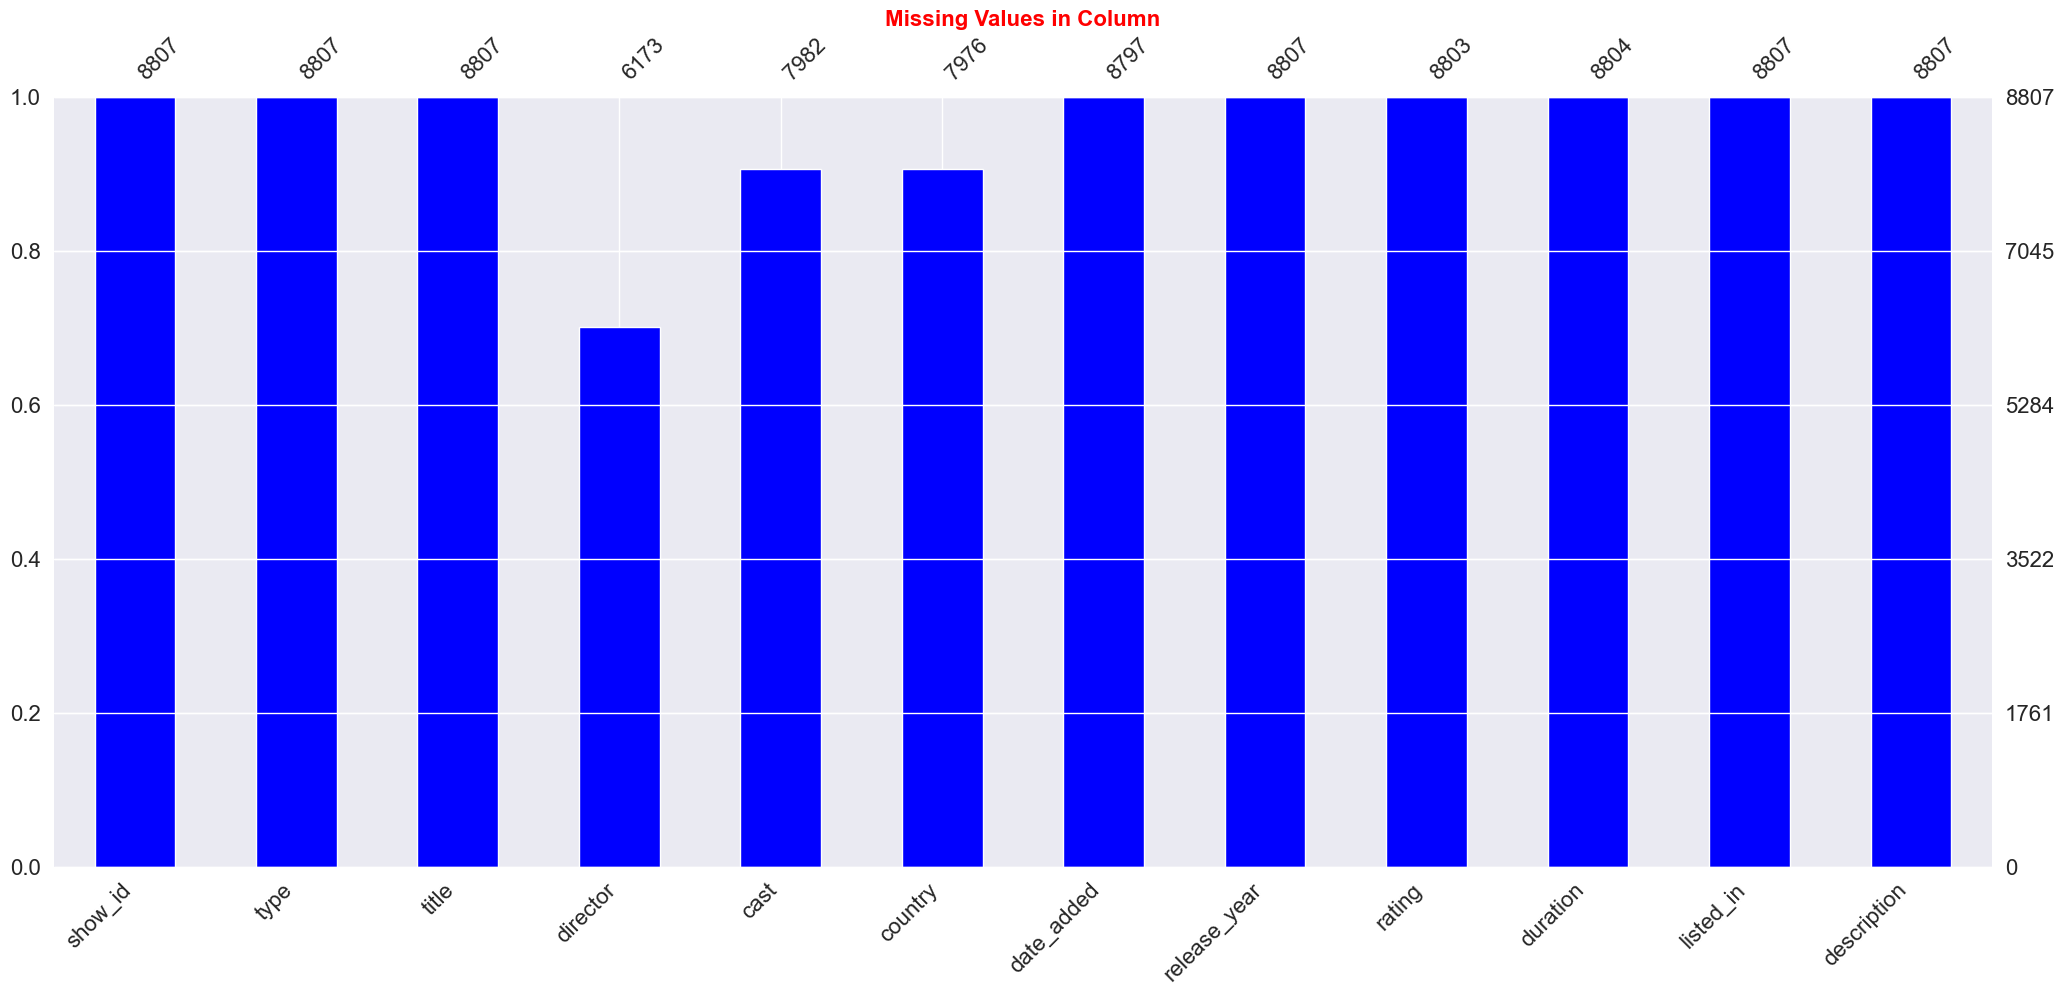

In [8]:
# Visualizing the missing values
plt.figure(figsize=(14, 5),dpi=100)
msno.bar(df, color = 'blue')
plt.title("Missing Values in Column",fontweight="bold",size=16,color='red')
plt.show()

### What did you know about your dataset?

* The dataset contains information about specific movies.
* There are NaN values present in the director, cast, country, date_added, and rating columns.
* It is not possible to impute missing values using any method, as the data is specific to each movie.
* To avoid losing any data, the decision has been made to impute NaN values with empty space. This approach may not always be the best option, as external sources could potentially provide missing information for some of the columns. 

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ***3. Variables Description***

- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  show_id is 8807
No. of unique values in  type is 2
No. of unique values in  title is 8807
No. of unique values in  director is 4528
No. of unique values in  cast is 7692
No. of unique values in  country is 748
No. of unique values in  date_added is 1767
No. of unique values in  release_year is 74
No. of unique values in  rating is 17
No. of unique values in  duration is 220
No. of unique values in  listed_in is 514
No. of unique values in  description is 8775


* After analyzing the dataset, it has been decided to focus on specific columns for modeling purposes.
* The columns of interest are 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description'. These columns are believed to carry a lot of information that will be useful for modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Exploratory Data Analysis (EDA) is a crucial initial step before making any modifications to a dataset or creating a statistical model to address business problems. The EDA process involves summarizing, visualizing, and gaining a deep understanding of the significant characteristics of a dataset. In essence, EDA is aimed at exploring and discovering insights from the data to inform subsequent data processing, modeling, and decision-making activities.

### **4.1. Type Column:**

In [12]:
# Number of Movies and TV Shows in the dataset
print(df.type.value_counts())
print(" ")

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
 


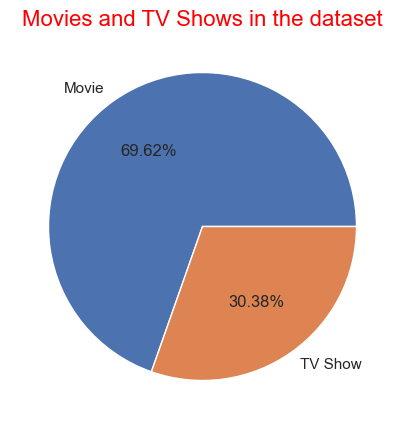

In [13]:
# visualization of Movies and TV Shows in the dataset
plt.figure(figsize=(10,5),dpi=100)
df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset',fontsize=16,color='red');

* The dataset contains more movies than TV shows. Specifically, 69.05% of the data pertains to movies, while 30.95% pertains to TV shows.

* The words like Christmas, Love, World, Man and  Story are very comman word which are appear most in movie title column.  

### **4.2 Director column:**

In [15]:
# Printing the Number of Directors for Movies and TV Shows Separately

print(f"number of director who  by directed movie : { df[df['type']=='Movie']['director'].value_counts().sum()}")
print(f"number of director who  by directed TV Show : { df[df['type']=='TV Show']['director'].value_counts().sum()}")

number of director who  by directed movie : 5943
number of director who  by directed TV Show : 230


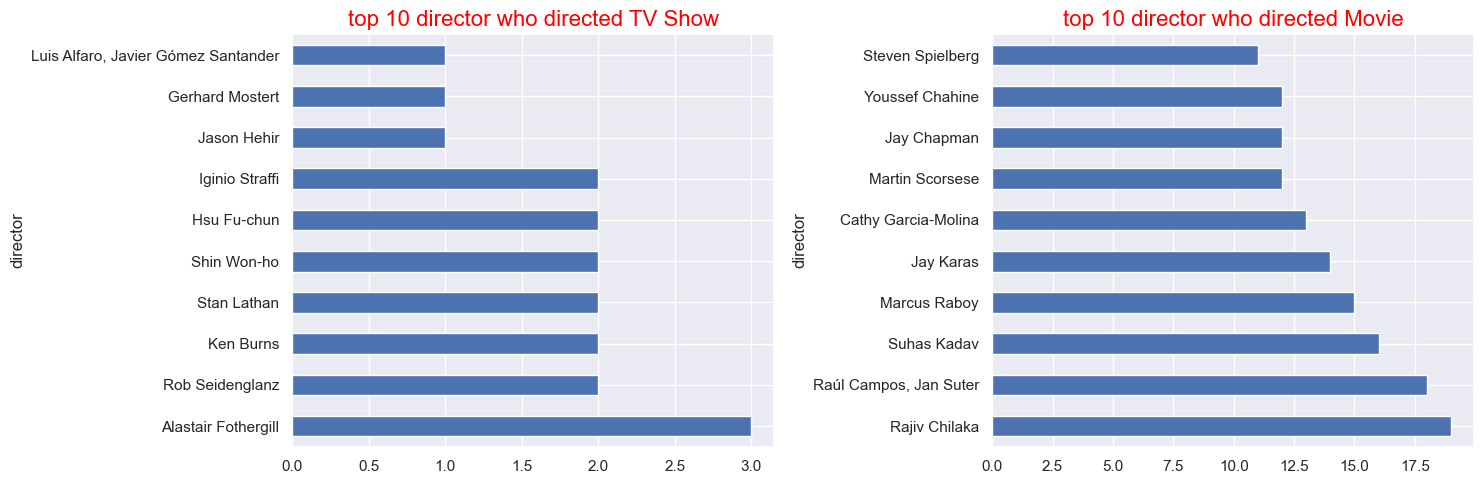

In [16]:
#defining fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# top 10 director who directed TV show
show = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=16,color='red')

# top 10 director who directed movie
movie = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=16,color='red')

plt.tight_layout()
plt.show()

* The director Alastair Fothergill has directed three TV shows, which is the highest number of TV shows directed by any director in the dataset.
* Raul Campos and Jan Suter have collaborated directed 18 movies, which is the highest number compared to any other director pair in the dataset. Following them are Marcus Raboy, Jay Karas, and Cathy Garcia-Molina.


### **4.3 Cast column:**

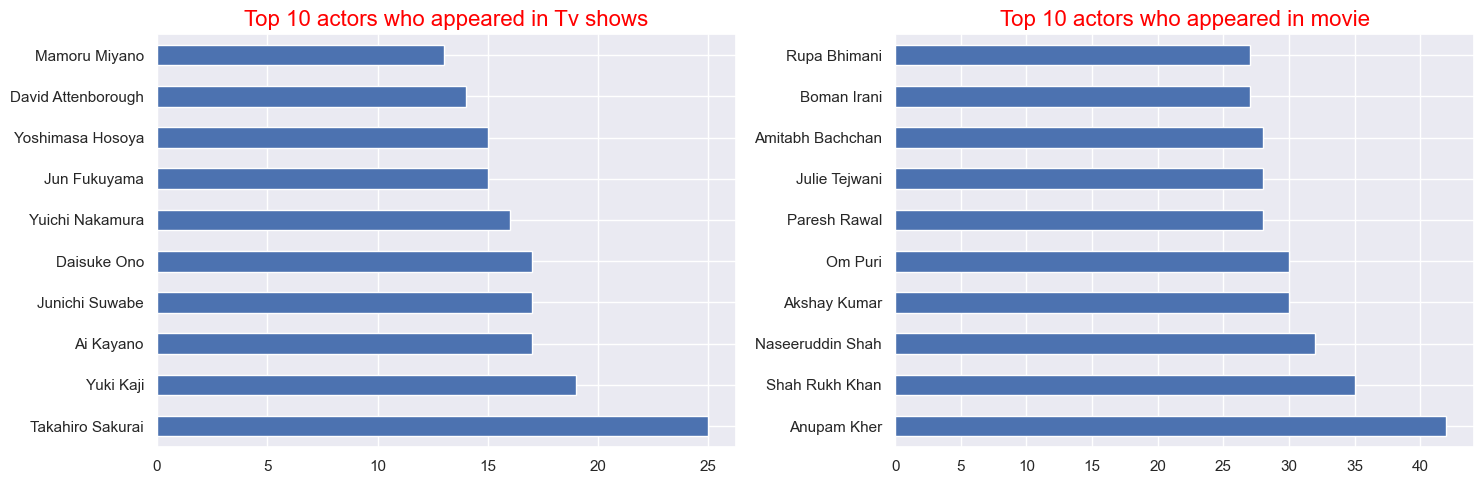

In [17]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# top 10 TV shows actor 
TV_shows = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=16,color='red')

# top 10 Movie actor 
movies = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in movie', size=16,color='red')

plt.tight_layout()
plt.show()

* Takahiro Sakurai, Yuki Kaji and Daisuke Ono played highest role in the TV shows.
* Anupam Kher, Shahrukh Khan and Om Puri played highest number of role in the movies.

Text(0.5, 1.0, 'Top 10 countries with the highest number of movies / TV shows')

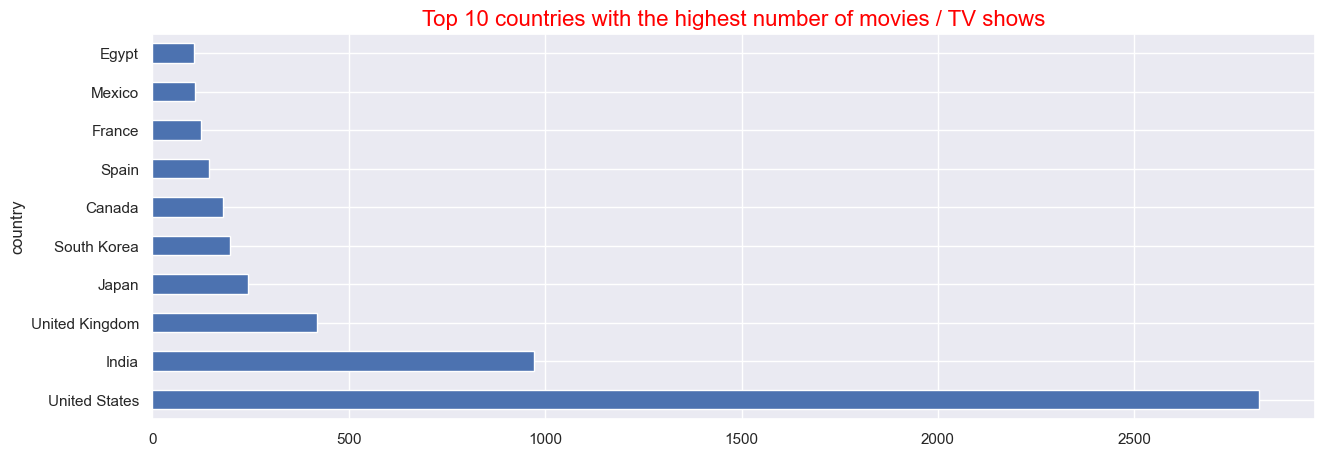

In [18]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(15,5),dpi=100)
df.country.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 countries with the highest number of movies / TV shows',fontsize=16,color='red')

* The highest number of movies / TV shows were based out of the US, followed by India and UK.

### **4.4 Release_Year column:**

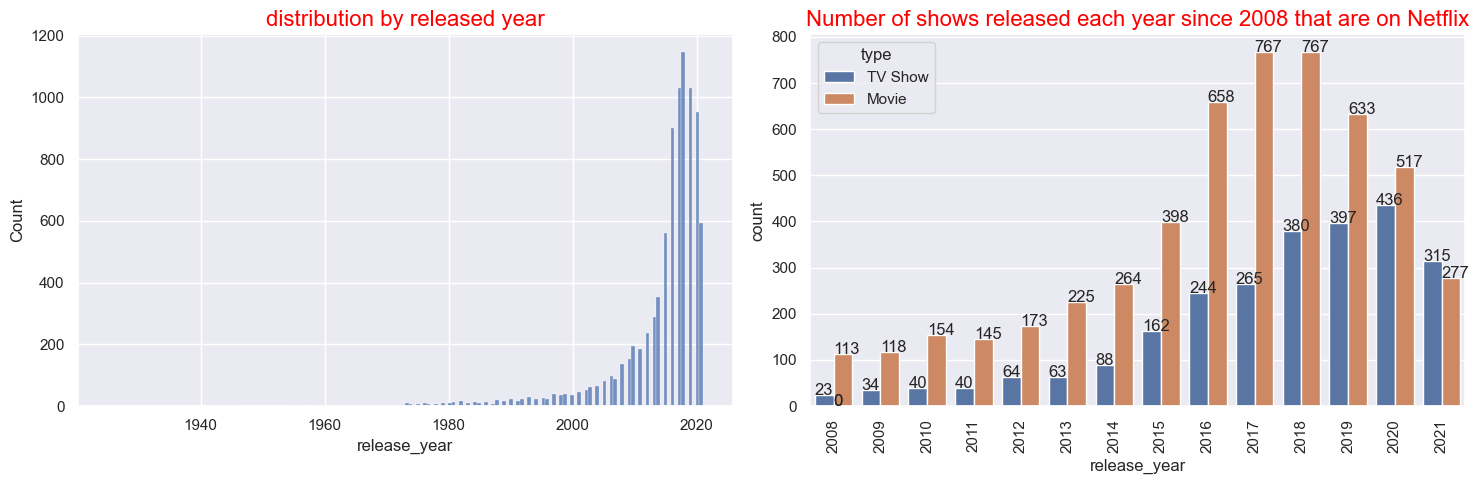

In [19]:
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('distribution by released year',fontsize=16,color='red')

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=range(2008,2022), ax=ax[1])
count.set_title('Number of shows released each year since 2008 that are on Netflix',fontsize=16,color='red')
plt.xticks(rotation=90)
for p in count.patches:  #adding value count on the top of bar
   count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

* Netflix has more new movies and TV shows than old ones.
* The company has a consistent focus on adding new shows to its platform.
* In 2020, there was a decrease in the number of movies added, but not in the number of TV shows added. This could indicate a shift towards introducing more TV series rather than movies on Netflix.

### **4.5 Rating column:**

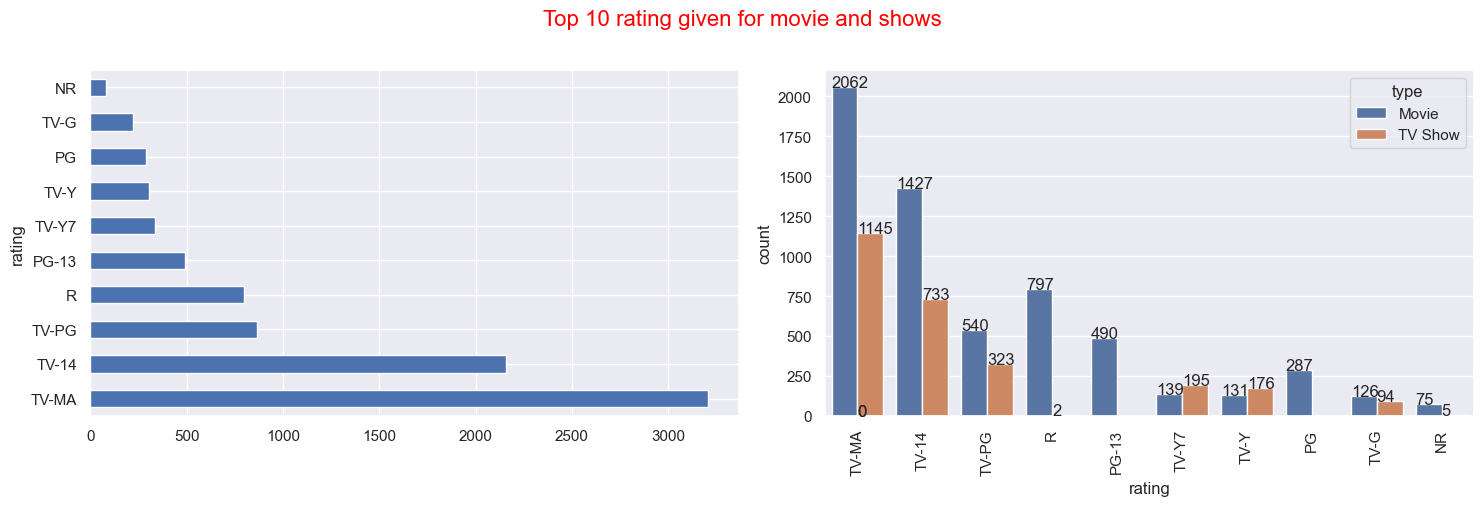

In [20]:
# Top 10 Rating 
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)
plt.suptitle('Top 10 rating given for movie and shows', size=16,color='red', y=1.01)

# univariate analysis
df['rating'].value_counts()[:10].plot(kind='barh',ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

* Most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).



### **4.6 Duration column:**

In [21]:
# duration column
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [22]:
# Creating different dataset from duration

netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

Text(0.5, 1.0, 'Top 10 genres')

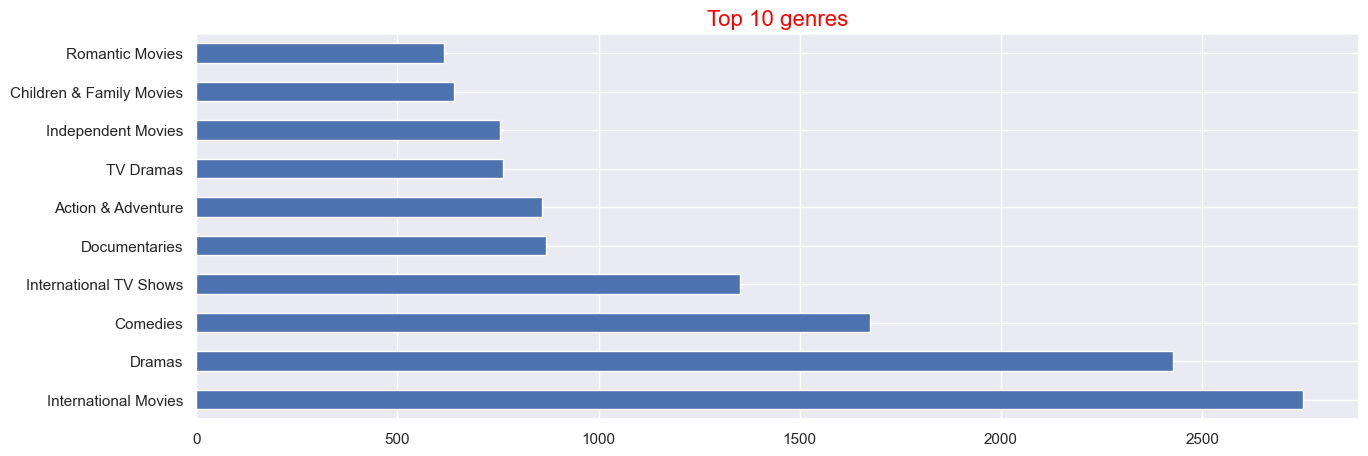

In [24]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
plt.figure(figsize=(15,5),dpi=100)
genres = genres.value_counts()[:10].plot(kind='barh')
plt.title('Top 10 genres',fontsize=16,color='red')

* The International movie is the most popular genre followed by dramas and comedies.

### **Description**

In [25]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

* Most of the comman words present in description column are family, find, life, love, new, world, friend.


## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [26]:
# Missing Data %
round(df.isna().mean().sort_values(ascending=False)*100,2)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

* For the missing values in the director, cast, and country attributes, the 'empty string' can be used as a replacement.
* The percentage of null values in the rating and date_added columns is small, and dropping these values may not significantly impact model building.

In [27]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [28]:
# checking for null values after treating them.
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We have successfully handled all the missing values in the dataset.

### 2. Handling Outliers

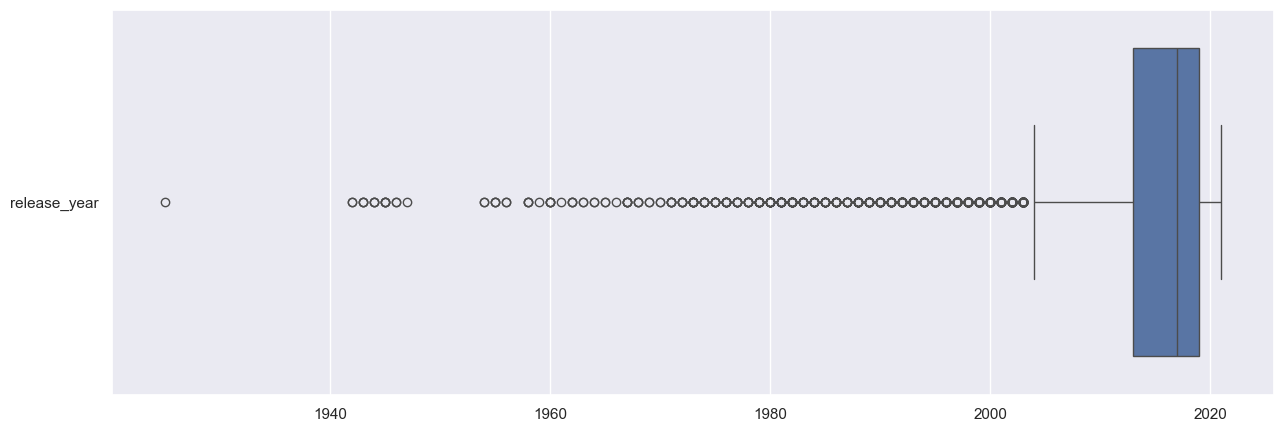

In [29]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(15,5),dpi=100)
sns.boxplot(data=df,orient='h');

* Outlier handling may not be necessary for textual data as outliers are typically defined in numerical data.
* Data cleaning and preprocessing steps are still necessary to ensure the data is ready for model building.

## ***6. Textual Data Preprocessing***
**Modeling Approach**
Here are the steps for the modeling approach:

1. Select the attributes that will be used to cluster the shows.
2. Perform text preprocessing by removing stopwords and punctuation marks, and converting all textual data to lowercase.
3. Use stemming to generate a meaningful word out of the corpus of words.
4. Tokenize the corpus and perform word vectorization.
5. Apply dimensionality reduction techniques to reduce the dimensionality of the dataset.
6. Use different algorithms to cluster the movies and determine the optimal number of clusters using various techniques such as the elbow method or silhouette score.
7. Build the optimal number of clusters and visualize the contents of each cluster using word clouds to gain insights about the characteristics of each cluster.

### **6.1. Clustering Attributes**

We will cluster the movie/shows on Netflix based on the following attributes:

- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

In [30]:
# Copying the original dataset for clustering as it does not contain any missing values to handle
df = df.copy()

In [31]:
# creating clustering_attributes column using all text column which one is used for model building purpose.
df['clustering_attributes'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director']

In [32]:
df.clustering_attributes[1]

'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.International TV Shows, TV Dramas, TV MysteriesTV-MAAma Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick MofokengSouth Africa '

In [33]:
df['clustering_attributes'].head(10)

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
5    The arrival of a charismatic young priest brin...
6    Equestria's divided. But a bright-eyed hero be...
7    On a photo shoot in Ghana, an American model s...
8    A talented batch of amateur bakers face off in...
9    A woman adjusting to life after a loss contend...
Name: clustering_attributes, dtype: object

* All the required data has been successfully consolidated into a single column.

### **6.2. Removing stopwords and lower case:**

In [34]:
# Download the stop words list if it hasn't been downloaded already
nltk.download('stopwords')

# Create a set of English stop words
stop_words = stopwords.words('english')

# Display the stop words
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [37]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()


def remove_stop_words(test):
    test=re.sub('[^a-zA-Z]'," ",test)
    test=test.lower()
    test=test.split()
    test= [ps.stem(word) for word in test if not word in set(stopwords.words('english'))]
    return " ".join(test)

In [38]:
# Removing stop words
df['clustering_attributes'] = df['clustering_attributes'].apply(remove_stop_words)

In [39]:
df['clustering_attributes'][2]

'protect famili power drug lord skill thief mehdi expert team robber pull violent deadli turf war crime tv show intern tv show tv action adventuretv masami bouajila traci gotoa samuel jouy nabiha akkari sofia lesaffr salim kechiouch noureddin farihi geert van rampelberg bakari diombera julien leclercq'

* The corpus has been successfully converted to lowercase and all the stopwords have been removed.

Removing punctuation is a common preprocessing step in natural language processing (NLP) tasks. Punctuation marks such as periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can impact the performance of NLP models.

* All the punctuation marks have been successfully dropped from the corpus.

### **Text Vectorization**.

Text Vectorization is the process of converting text into numerical representation

- We will  vectorized the corpus using **TFIDF vectorizer**, where TFIDF stands for **Term Frequency Inverse Document Frequency**.

\begin{align}
        TF = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document}
    \end{align}

\begin{align}
        IDF(t) = log_e(\frac{Total\  number \ of \ documents}{ Number\ of\ documents\ with\ term\ t\ in\ it })
    \end{align}

\begin{align}
TFIDF = {TF\ *\ IDF}
    \end{align}

In [40]:
# # extract the tfid representation matrix of the text data
tfid_vectorizer= TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)  # max features = 10000 to prevent system from crashing
tfid_matrix = tfid_vectorizer.fit_transform(df['clustering_attributes'])        

# collect the tfid matrix in numpy array
array = tfid_matrix.toarray()  

In [41]:
#  Print Shape and Data Type of a NumPy Array
print(array)
print(f'shape of the vector : {array.shape}')
print(f'datatype : {type(array)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (8790, 10000)
datatype : <class 'numpy.ndarray'>


#### 5. **Dimensionality Reduction:**

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible.

* PCA (Principal Component Analysis) can be used to reduce the dimensionality of the data.

In [42]:
# using PCA to reduce dimensionality
pca = PCA(random_state=0)
pca.fit(array)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,0


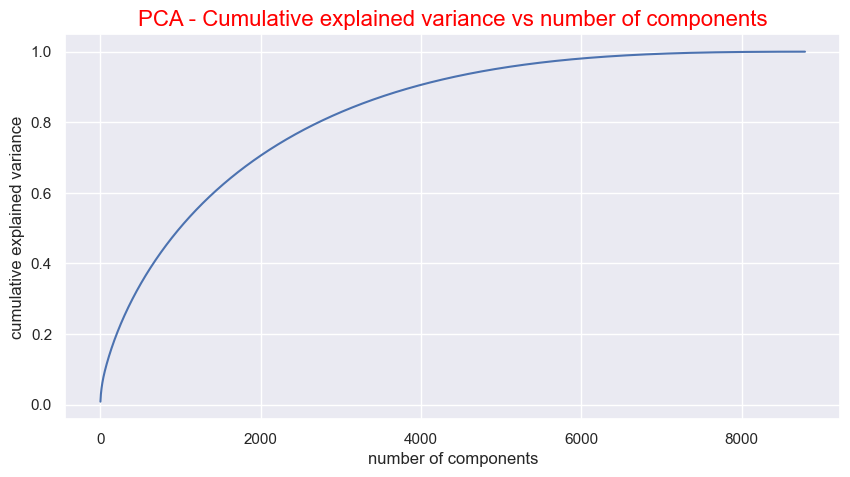

In [43]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components',fontsize=16,color='red')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* After performing PCA, it was found that ~7600 components can explain 100% of the variance in the data.
* More than 80% of the variance can be explained by just 4000 components.
* Selecting the top 4000 components can help simplify the model and reduce dimensionality while still capturing more than 80% of the variance.

In [44]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=0)
pca.fit(array)

,n_components,4000
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,0


In [45]:
# transformed features
X = pca.transform(array)

# shape of transformed vectors
X.shape

(8790, 4000)

* The dimensionality of the data has been successfully reduced using PCA.

## **7. ML Model Implementation**
## Clusters implementation

### **7.1. K-Means Clustering**

* K-means clustering is a popular unsupervised machine learning algorithm that divides a dataset into a predefined number of clusters. Since it is an unsupervised algorithm, it does not rely on labeled examples to learn about the data. To determine the optimal number of clusters for the K-means algorithm, we can use the elbow curve and Silhouette score visualization techniques.

### Elbow method to find the optimal value of k

* The elbow curve is a plot of the sum of squared distances between each point and the centroid in a cluster against the number of clusters. As the number of clusters increases, the sum of squared distances generally decreases. The "elbow" point on the curve represents the optimal number of clusters, beyond which the decrease in sum of squared distances is not significant.

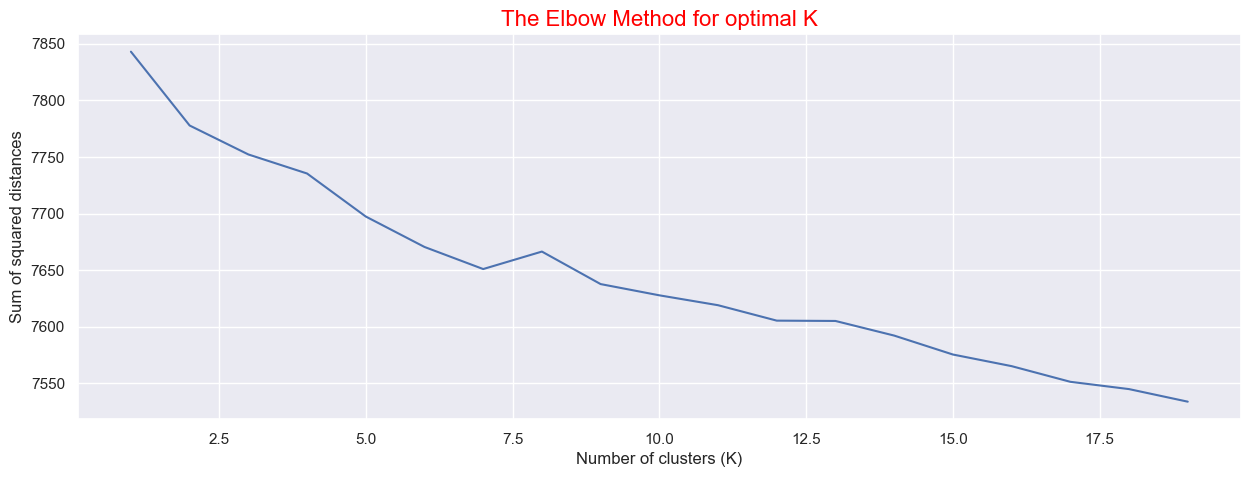

In [46]:
# The Elbow Method for Determining Optimal Number of Clusters

sum_of_sq_dist =[]
for i in range(1,20):
  # Initialize the k-means model with the current value of i
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  sum_of_sq_dist.append(kmeans.inertia_)

# Plot the value of SSE
number_clusters = range(1,20)
plt.figure(figsize=(15,5),dpi=100)
plt.plot(number_clusters,sum_of_sq_dist)
plt.title('The Elbow Method for optimal K',fontsize=16,color='red')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances')
plt.show()

* Select the number of clusters as 10, as no drastic difference is visible after that.

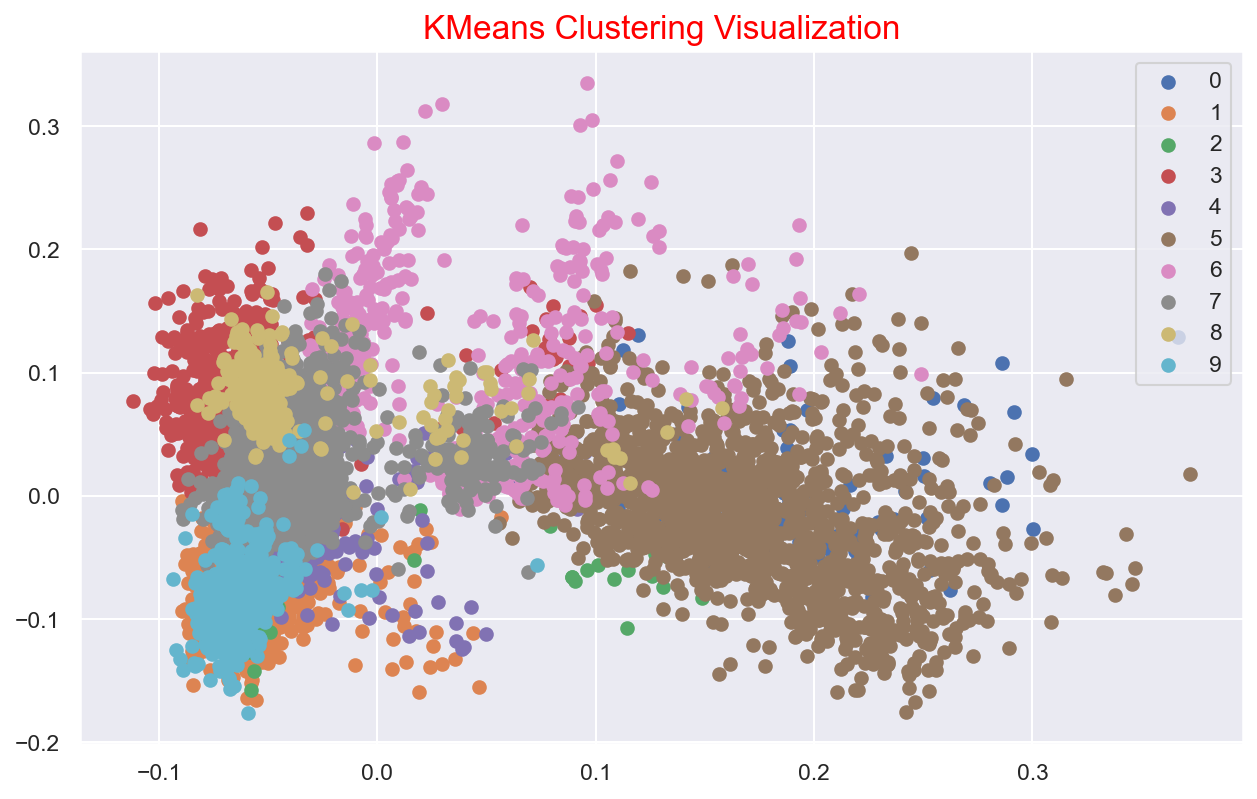

In [47]:
# KMeans Clustering Visualization of Data Points
plt.figure(figsize=(10,6), dpi=150)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=0)
#kmeans.fit(X)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.title('KMeans Clustering Visualization',fontsize=16,color='red')
plt.show()

### Silhouette score method to find the optimal value of k

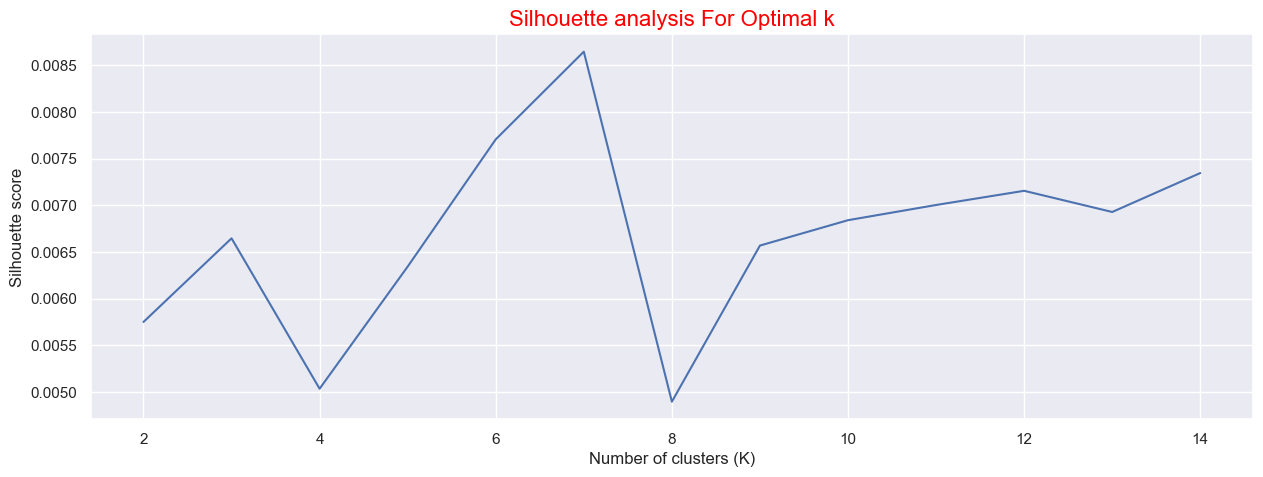

In [48]:
# Initialize a list to store the silhouette score for each value of k
silhouette_scr = []

for k in range(2, 15):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_scr.append(score)
  
# Plot the Silhouette analysis
plt.figure(figsize=(15,5),dpi=100)
plt.plot(range(2,15), silhouette_scr)
plt.xlabel('Number of clusters (K)') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k',fontsize=16,color='red')
plt.show()

* **The highest Silhouette score is obtained for 6 clusters.**

## Building clusters using the k-means algorithm:

In [49]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0)
kmeans.fit(X)

,n_clusters,7
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [50]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(7650.931931344287, 0.008644420819801078)


In [51]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

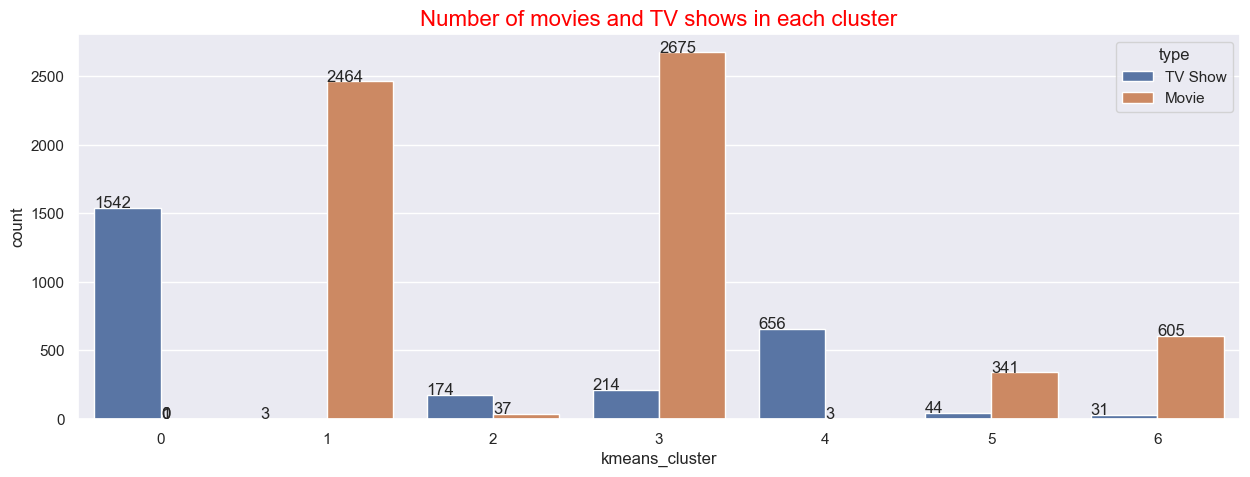

In [53]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(15,5),dpi=100)
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster',fontsize=16,color='red')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

* Successfully built 6 clusters using the k-means clustering algorithm.

## **7.2. Hierarchical clustering:**

The agglomerative (hierarchical) clustering algorithm is employed to construct clusters. This approach involves merging clusters that are similar, starting with each sample as a single-sample cluster, and building a hierarchy of clusters from the bottom up. To determine the optimal number of clusters, a dendrogram can be visualized when using the agglomerative (hierarchical) clustering algorithm.

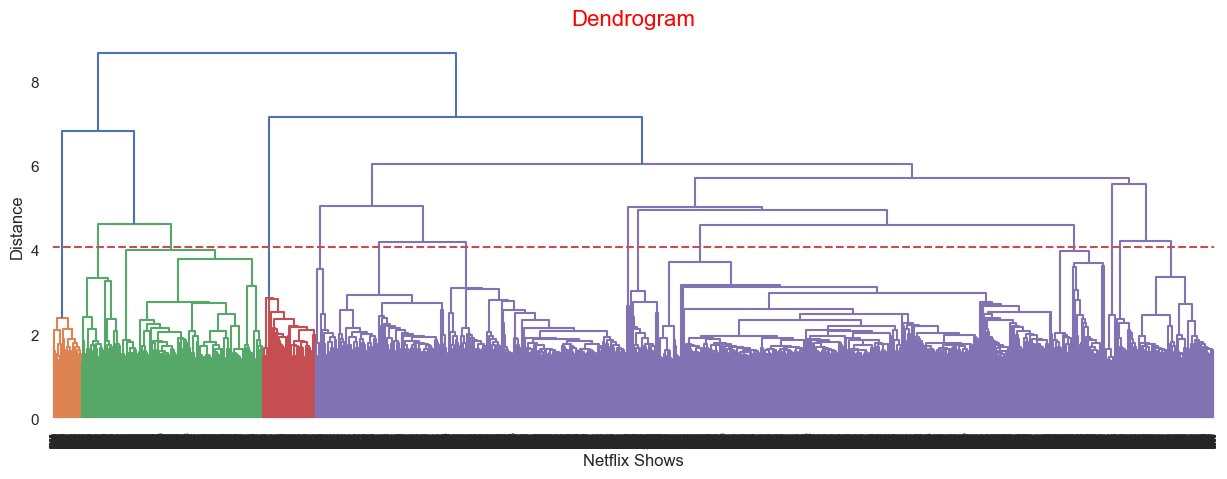

In [54]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(15,5),dpi=100)  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram',fontsize=16,color='red')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4.1, color='r', linestyle='--')

* Using the agglomerative clustering algorithm, it is possible to construct 7 clusters at a distance of 4.1 units.

In [56]:
# Fitting hierarchical clustering model

hierarchical = AgglomerativeClustering(n_clusters=7,  linkage='ward')  
hierarchical.fit_predict(X)

array([2, 1, 2, ..., 2, 2, 4], shape=(8790,))

In [57]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

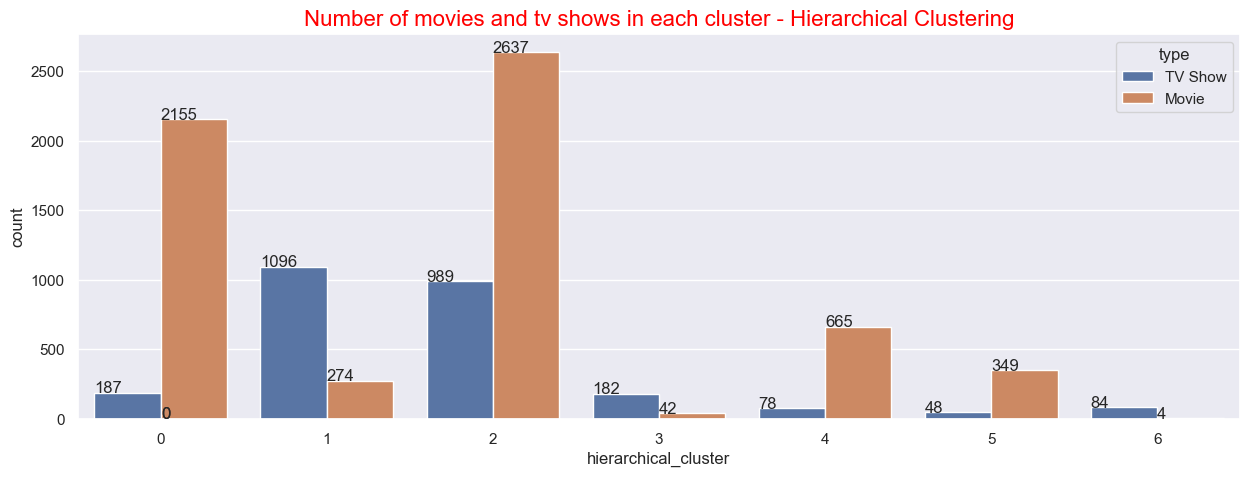

In [59]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(15,5),dpi=100)
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering',fontsize=16,color='red')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

* The Agglomerative (hierarchical) clustering algorithm was utilized to construct 7 clusters successfully.

# **8. Content based recommender system:**

* Content-based recommendation systems make recommendations to users by utilizing the similarities between items. These recommendation systems suggest products or items to users based on their descriptions or features, and they determine the degree of similarity between the products by analyzing their descriptions.

In [60]:
# veryfying index
df[['show_id', 'title', 'clustering_attributes']]

,show_id,title,clustering_attributes
0,s1,Dick Johnson Is Dead,father near end life filmmak kirsten johnson s...
1,s2,Blood & Water,cross path parti cape town teen set prove whet...
2,s3,Ganglands,protect famili power drug lord skill thief meh...
3,s4,Jailbirds New Orleans,feud flirtat toilet talk go among incarcer wom...
4,s5,Kota Factory,citi coach center known train india finest col...
...,...,...,...
8802,s8803,Zodiac,polit cartoonist crime report pair cop investi...
8803,s8804,Zombie Dumb,live alon spooki town young girl befriend motl...
8804,s8805,Zombieland,look surviv world taken zombi dorki colleg stu...
8805,s8806,Zoom,drag civilian life former superhero must train...


* As shown in the above dataframe, the total number of rows present in our dataframe is 7770. However, the last index appears as 7786 due to the dropping of some rows while handling null values.



In [61]:
# defining a new df for building a recommender system
recommender_df = df.copy()

In [62]:
# reseting index
recommender_df.reset_index(inplace=True)

# checking reset index 
recommender_df[['show_id', 'title', 'clustering_attributes']]

,show_id,title,clustering_attributes
0,s1,Dick Johnson Is Dead,father near end life filmmak kirsten johnson s...
1,s2,Blood & Water,cross path parti cape town teen set prove whet...
2,s3,Ganglands,protect famili power drug lord skill thief meh...
3,s4,Jailbirds New Orleans,feud flirtat toilet talk go among incarcer wom...
4,s5,Kota Factory,citi coach center known train india finest col...
...,...,...,...
8785,s8803,Zodiac,polit cartoonist crime report pair cop investi...
8786,s8804,Zombie Dumb,live alon spooki town young girl befriend motl...
8787,s8805,Zombieland,look surviv world taken zombi dorki colleg stu...
8788,s8806,Zoom,drag civilian life former superhero must train...


* The index has been successfully reset, and the dataset is now ready to be used for building a content-based recommendation system.

In [63]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [64]:
# calling out transformed array after performing PCA for dimenssionality reduction.
X

array([[-0.04922812,  0.05147683,  0.01087199, ...,  0.0035638 ,
        -0.0037706 ,  0.00164163],
       [ 0.14818628, -0.04002675,  0.00828821, ..., -0.00394829,
         0.02139681, -0.00510701],
       [ 0.17783051, -0.00607977, -0.0099732 , ...,  0.00169631,
         0.00386845, -0.01084106],
       ...,
       [-0.04038811,  0.00884836,  0.00881054, ..., -0.00179906,
        -0.00303881, -0.00069134],
       [-0.05872702,  0.01036724,  0.01638681, ...,  0.00058831,
        -0.01334089,  0.00271003],
       [-0.0788938 , -0.05188002, -0.04254102, ...,  0.00826253,
        -0.01225246, -0.01499419]], shape=(8790, 4000))

In [65]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.00000000e+00, -1.80214493e-02, -2.12109835e-02, ...,
        -9.93625024e-03,  6.22202393e-03,  5.20565320e-02],
       [-1.80214493e-02,  1.00000000e+00,  2.71752865e-02, ...,
         1.07988515e-02, -2.06508458e-02, -1.33368933e-02],
       [-2.12109835e-02,  2.71752865e-02,  1.00000000e+00, ...,
         3.65105263e-03, -1.24465997e-02, -1.21615982e-02],
       ...,
       [-9.93625024e-03,  1.07988515e-02,  3.65105263e-03, ...,
         1.00000000e+00,  5.47630443e-02, -9.24561369e-03],
       [ 6.22202393e-03, -2.06508458e-02, -1.24465997e-02, ...,
         5.47630443e-02,  1.00000000e+00,  2.93878620e-04],
       [ 5.20565320e-02, -1.33368933e-02, -1.21615982e-02, ...,
        -9.24561369e-03,  2.93878620e-04,  1.00000000e+00]],
      shape=(8790, 8790))

In [69]:
# Function for list down top 10 recommended movie on the basis of cosine similarity score.
def recommend(movie):
  try:
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    # Empty list
    recommend_content = []   
    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]
    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    # printing Statement
    print(f"If you liked '{movie}', you may also enjoy: \n")
    # listing top ten recommenaded movie
    for i in distances[1:11]:
      recommend_content.append(df.iloc[i[0]].title)
    return recommend_content
  except:
     return 'Invalid Entry'

In [70]:
recommend('Naruto')

If you liked 'Naruto', you may also enjoy: 



['Naruto Shippûden the Movie: Bonds',
 'Naruto the Movie: Ninja Clash in the Land of Snow',
 'Naruto Shippuden the Movie: Blood Prison',
 'Naruto Shippuden : Blood Prison',
 'Naruto Shippuden: The Movie',
 'Naruto the Movie 3: Guardians of the Crescent Moon Kingdom',
 'Naruto Shippûden the Movie: The Will of Fire',
 'Naruto the Movie 2: Legend of the Stone of Gelel',
 'Naruto Shippuden: The Movie: The Lost Tower',
 'Ninja Hattori']

In [71]:
recommend('A Man Called God')

If you liked 'A Man Called God', you may also enjoy: 



['The King: Eternal Monarch',
 'My Secret Romance',
 'Because This Is My First Life',
 'The Lies Within',
 'Man to Man',
 'Romance is a bonus book',
 'Misaeng',
 'Was It Love?',
 'Second 20s',
 'One Spring Night']

In [72]:
recommend('Avenger')

'Invalid Entry'

In [73]:
recommend('Phir Hera Pheri')

If you liked 'Phir Hera Pheri', you may also enjoy: 



['Bhool Bhulaiyaa',
 'Awara Paagal Deewana',
 'Ready',
 'Bhagam Bhag',
 'Chup Chup Ke',
 'Khushi',
 'Golmaal: Fun Unlimited',
 'Kucch To Hai',
 'Thank You',
 'Hasee Toh Phasee']

# **9. Conclusion**

In this project, I worked on a text clustering problem in which I clustered Netflix shows into groups with similar attributes. Here's a summary of my findings and actions taken:

* The dataset had 7787 records and 11 attributes. I performed exploratory data analysis and handled missing values.
* I discovered that Netflix has more movies than TV shows, and the number of shows on the platform is growing rapidly. Most shows are produced in the United States.
* I chose to cluster the data based on attributes such as director, cast, country, genre, rating, and description. I tokenized, preprocessed, and vectorized these attributes using TFIDF Vectorizer, resulting in 10,000 attributes.
* To reduce dimensionality, I utilized Principal Component Analysis (PCA), with 4,000 components capturing over 80% of variance.
* I used K-Means Clustering to build the initial clusters, with the optimal number of clusters being 6 as determined by the elbow method and Silhouette score analysis.
* Agglomerative clustering was used to create clusters, with 7 being the optimal number determined by visualizing the dendrogram.
* Finally, I developed a content-based recommender system using cosine similarity on the similarity matrix. The recommender system recommends the top 10 shows based on the type of show the user has watched.





# **THANK YOU !**